# Modeling 2: Klassifikation

## Anforderungen an Projektumsetzung: Klassifikation

Falls die Anforderungen auf den eigenen Projektdatensatz nicht anwendbar sind, gibt es folgende Möglichkeiten:
- Datensatz um passende Daten erweitern entweder manuell, per Anspielen aus weiterer Datenquelle oder zur Not per zufälliger Datengenerierung/-simulation
- Datensatz außerhalb des Projekts wählen und Anforderungen daran umsetzen

Anforderungen:
- Führen Sie mit dem Algorithmus Ihrer Wahl eine Klassifikationsaufgabe auf Ihren Daten durch.

- Teilen Sie dazu zunächst die Daten auf, um Overfitting beim Trainieren des Algorithmus und bei der Parameterauswahl zu vermeiden. Erklären Sie die gewählte Strategie und die Größenverhältnisse.

- Wählen Sie geeignete Features aus und setzen Sie die Parameter des Algorithmus. Beschreiben Sie das gewälhte Vorgehen für die Auswahl der Features und Parameter. Berichten Sie den Parameterraum und die final gewählten Parameter. Geben Sie die Performanz auf den Trainingsdaten (bzw. Entwicklungsdaten, falls verwendet) an.

- Evaluieren Sie die Klassifikation auf den ungesehenen Testdaten. Betrachten Sie Precision und Recall sowie den F-Wert. Welches Maß ist für Ihre Anwendung wichtiger? Bewerten Sie Ihr Ergebnis. Ist es in der Praxis voraussichtlich zufriedenstellend?

#### Laden der Bibliotheken & des Datensatzes

In [37]:
# Import der benötigten Bibliotheken

import importlib
import init_notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [38]:
importlib.reload(init_notebook)

dataset = init_notebook.get_final_dataset()

dataset = shuffle(dataset)

c:\Users\SebastianGrab\OneDrive - DESIGNated Accessoires UG\Desktop\DataAnalytics\Projekt\Anforderungen\init_notebook.py:12: SyntaxWarning: invalid escape sequence '\P'
  file_path = str(os.getcwd()).split("\Projekt")


#### Führen Sie mit dem Algorithmus Ihrer Wahl eine Klassifikationsaufgabe auf Ihren Daten durch.
#### Teilen Sie dazu zunächst die Daten auf, um Overfitting beim Trainieren des Algorithmus und bei der Parameterauswahl zu vermeiden. Erklären Sie die gewählte Strategie und die Größenverhältnisse.

Teilen der Daten mithilfe der "train_test_split"-Funktion, da der Datensatz sortiert sein könnte und er so in random Trainings- und Testdatensätze zerteilt wird. 
Somit wird eine Durchmischung der Daten gewährleistet.

Aufgrund eines ausreichend großen Datensatzes wird erstmal keine Aufteilung nach CrossValidation (CV) benötigt.
Außerdem ist CV rechenintensiver. Um anfänglich schneller auf Ergebniss zu kommen, wird darauf verzichtet.

Bei nicht zufriedenstellenden Ergebnissen, würde dann jedoch rückwirkend auf CV zurückgergiffen werden.

Da genügend Daten im Datensatz vorhanden sind (rund 1 mio. Zeilen), können wir die Trainingsdaten auf 20 % des Gesamtumfangs festlegen.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Raucher_Status']), dataset['Raucher_Status'], test_size=0.2, random_state=42, stratify=dataset['Raucher_Status'])

X_train

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,Triglycerid,Hämoglobin,SGOT_AST,SGOT_ALT,gamma_GTP,Trinker,Body-Mass-Index
3754,1,40,170,60,77.0,120.0,80.0,79.0,196.0,36.0,118.0,211.0,16.4,20.0,15.0,22.0,1,20.76
717903,1,25,175,95,94.0,170.0,110.0,77.0,208.0,44.0,130.0,166.0,15.9,61.0,102.0,125.0,1,31.02
200961,1,30,170,60,75.0,102.0,72.0,96.0,255.0,79.0,154.0,112.0,15.6,23.0,25.0,21.0,1,20.76
299904,1,40,170,70,86.0,123.0,77.0,80.0,298.0,54.0,184.0,299.0,15.6,25.0,18.0,46.0,1,24.22
722094,1,40,160,65,83.4,119.0,65.0,99.0,212.0,76.0,121.0,72.0,14.7,19.0,22.0,14.0,1,25.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702232,0,40,160,45,69.0,106.0,68.0,117.0,160.0,70.0,67.0,113.0,12.9,17.0,12.0,27.0,1,17.58
424422,0,30,155,50,65.0,102.0,69.0,100.0,206.0,74.0,116.0,81.0,14.5,17.0,11.0,13.0,1,20.81
834109,1,60,170,60,86.0,116.0,67.0,100.0,185.0,76.0,88.0,101.0,13.6,24.0,15.0,43.0,1,20.76
658525,1,50,170,70,84.0,120.0,70.0,97.0,131.0,35.0,63.0,165.0,14.7,25.0,11.0,49.0,1,24.22


In [40]:
# Überprüfung der Altersverteilung der Trainingsdaten:

print(X_train['Alter'].min(), X_train['Alter'].max())


# Überprüfung der Altersverteilung der Testdaten:

print(X_test['Alter'].min(), X_test['Alter'].max())

20 85
20 85


In [41]:
# Überprüfung der Größe der Trainingsdaten:

print(len(X_train))


# Überprüfung der Größe der Testdaten:

print(len(X_test))

792775
198194


Hier zeigt sich, dass die Trainingsdaten 20 % des Gesamtdatensatzes entsprechen. 

#### Wählen Sie geeignete Features aus und setzen Sie die Parameter des Algorithmus. Beschreiben Sie das gewälhte Vorgehen für die Auswahl der Features und Parameter. Berichten Sie den Parameterraum und die final gewählten Parameter. Geben Sie die Performanz auf den Trainingsdaten (bzw. Entwicklungsdaten, falls verwendet) an.

Das Ziel unserer Klassifikation ist es, Probanden / Datensätze so zu klassifizieren, dass vorausgesagt werden kann, ob jemand Raucher ist oder nicht.

Hierfür wählen wir die Features durch die Korrelation und mit Hilfe der SelectFromModel-Klasse der feature_selection Library aus, um jeweils unterschiedliche Ansätze versuchen zu können.

In [42]:
# Regressionsverfahren:

# softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=1000)
# softmax_model.fit(X_train, y_train)

# Speichern:

# joblib.dump(softmax_model, 'Modelle/6_Klassifikation/softmax_model_1.joblib')

# Laden:

loaded_softmax_model = joblib.load('Modelle/6_Klassifikation/softmax_model_1.joblib')

In [43]:
# SelectFromModel Ansatz:

# feature_selection = SelectFromModel(loaded_softmax_model, threshold='mean')
# feature_selection.fit(X_train, y_train)

# Speichern:

# joblib.dump(feature_selection, 'Modelle/6_Klassifikation/feature_selection_A6.joblib')

# Laden:

loaded_feature_model = joblib.load('Modelle/6_Klassifikation/feature_selection_A6.joblib')


# Parameter ausgeben:

print('Feature_names_out: ' + str(loaded_feature_model.get_feature_names_out()))

print('Feature_names_in: ' + str(loaded_feature_model.feature_names_in_))

print('Model: ' + str(loaded_feature_model))

Feature_names_out: ['Geschlecht' 'Trinker']
Feature_names_in: ['Geschlecht' 'Alter' 'Größe' 'Gewicht' 'Hüftumfang'
 'Systolischer Blutdruck' 'Diastolischer Blutdruck'
 'Nüchterner Blutzucker' 'Totale Cholesterin' 'HDL_Cholesterin'
 'LDL_Cholesterin' 'Triglycerid' 'Hämoglobin' 'SGOT_AST' 'SGOT_ALT'
 'gamma_GTP' 'Trinker' 'Body-Mass-Index']
Model: SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                             multi_class='multinomial',
                                             penalty='l1', solver='saga'),
                threshold='mean')


Die ausgegebenen Features der SelectFromModel()-Funktion sind lediglich das Geschlecht und der Trinkerstatus.

Deshalb beziehen wir uns ebenso auf die folgende Korrelationsmatrix und selektieren manuell Features, die mit dem Raucherstatus korrelieren.

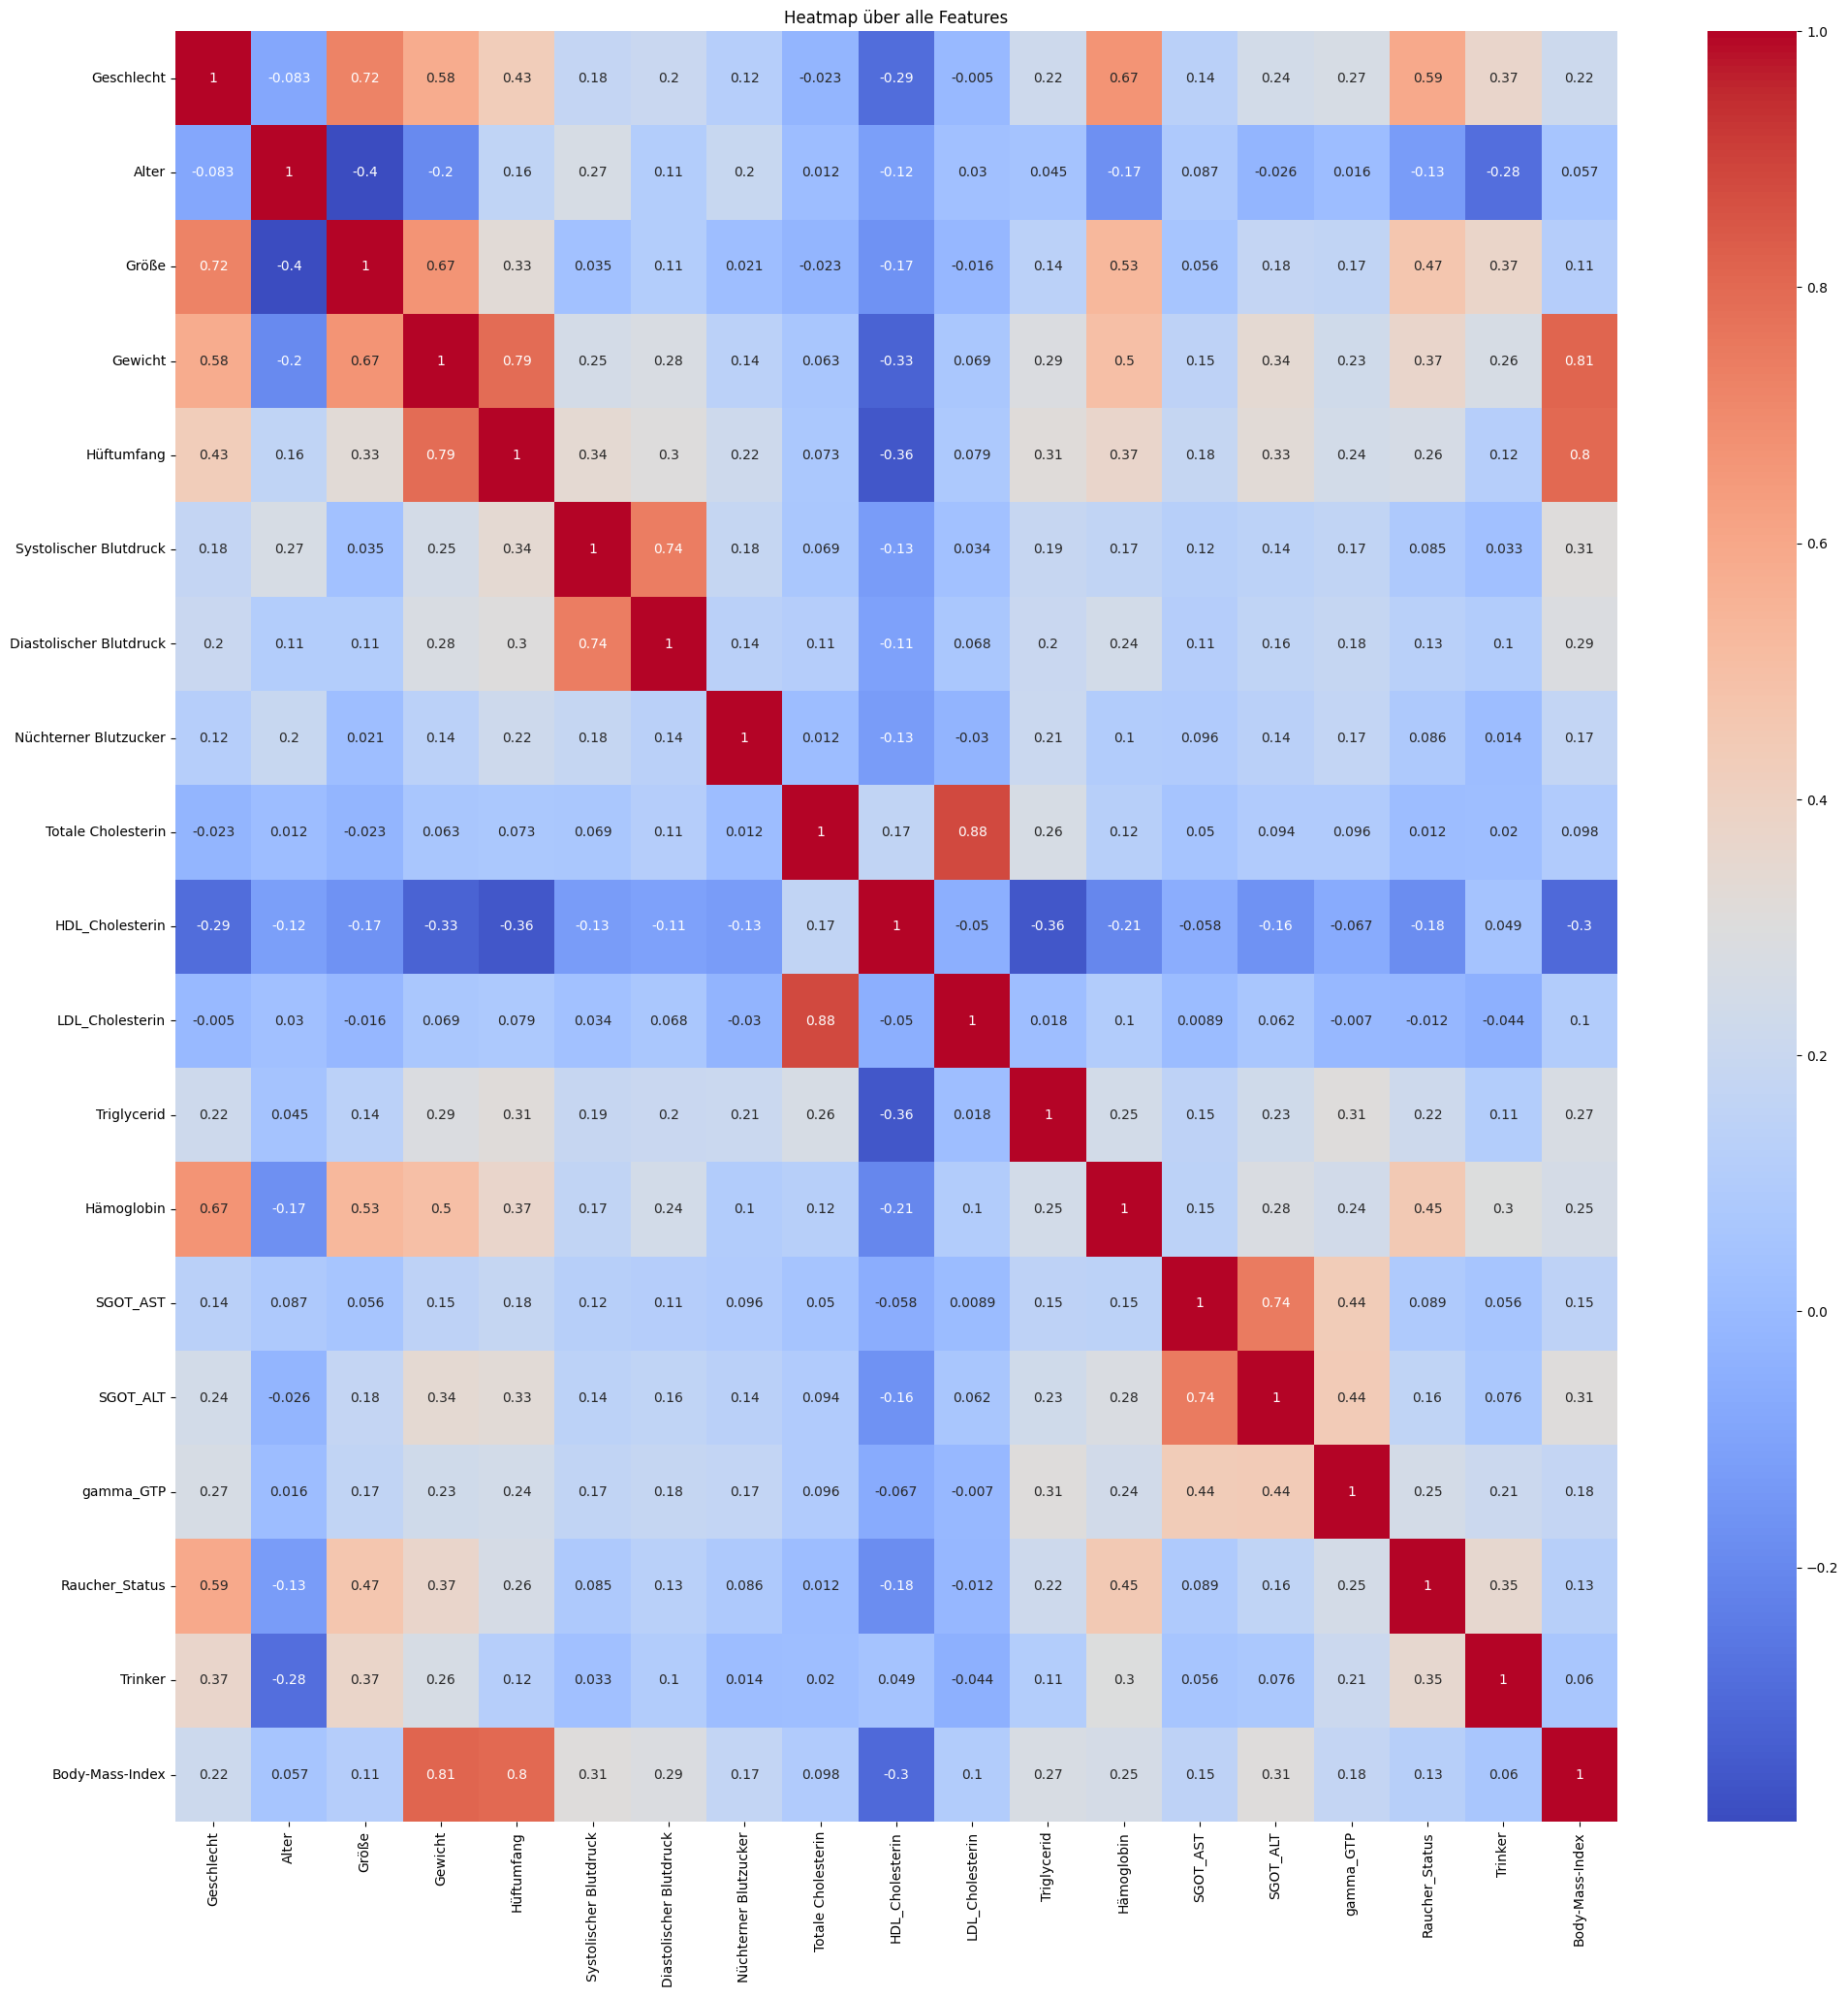

In [44]:
# Untersuchung der Korrelation aller Features in einer Heatmap:

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title('Heatmap über alle Features')
plt.show()

# Auswahl aller Features, die mit 'Raucher_Status' stärker korrelieren als 0,25 bzw. -0,25:

# 'Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker'

Daraus ergeben sich die folgenden Features:

'Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker'

In [45]:
# Features Selektieren nach den Ausgaben des Select-Models und der Regression/Korrelation:

# Select-Model: 
sf_model = X_train[['Geschlecht', 'Trinker']]

sf_model_test = X_test[['Geschlecht', 'Trinker']]



# Korrelation 1:
sf_corr = X_train[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

sf_corr_test = X_test[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]


# Korrelation 2:
sf_corr2 = X_train[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

sf_corr2_test = X_test[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

Der Datensatz konnte auf die für die Klassifikation als relevant bestimmten Features limitiert werden. 
Dies war nötig, da die Trainingszeit für mehrere Verfahren ansonsten zu lange gewesen wäre. 

#### Evaluieren Sie die Klassifikation auf den ungesehenen Testdaten. Betrachten Sie Precision und Recall sowie den F-Wert. Welches Maß ist für Ihre Anwendung wichtiger? Bewerten Sie Ihr Ergebnis. Ist es in der Praxis voraussichtlich zufriedenstellend?

In [46]:
# Erstes Modell:

# Der multi_class - Wert wird als multinomial festgelegt, da wir mehr als 2 Zielklassen haben.
# Der Solver "saga" wird für multinomiale lineare Regressionen empfohlen und ist für große Datasets geeignet.
# (Nach der Scikit Dokumentation ist saga oftmals der beste Solver)
# Hierfür verwenden wir zunächst einen max_iterator von 1000:

loaded_softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
loaded_softmax_model.fit(sf_model, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.67


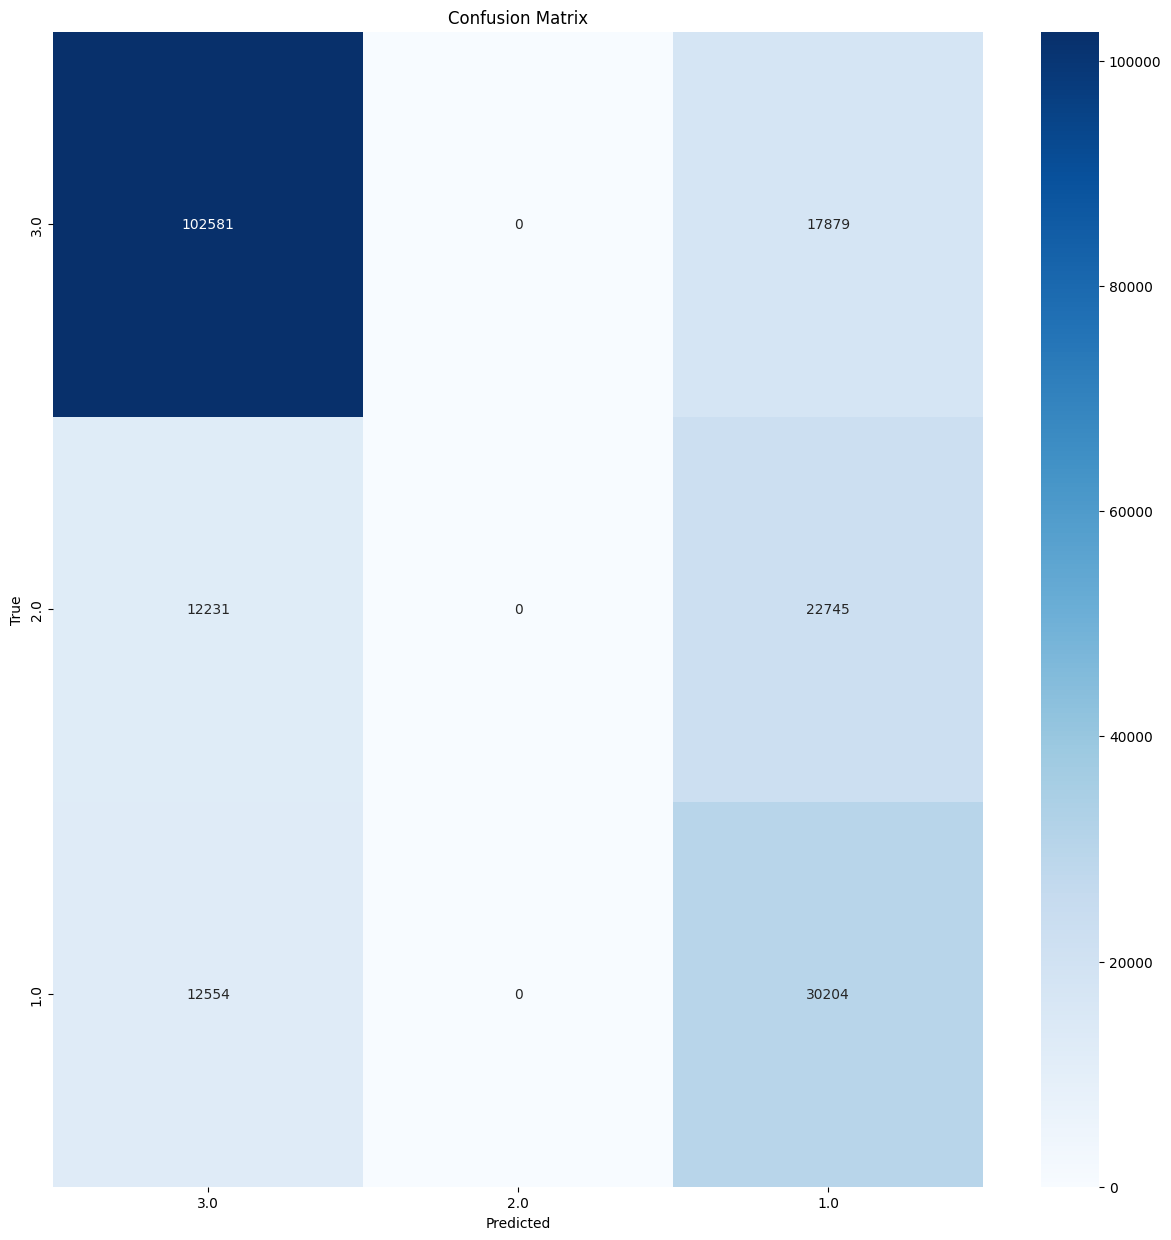

In [47]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_model = loaded_softmax_model.predict(sf_model_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_model)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_model)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset['Raucher_Status'].unique() , yticklabels=dataset['Raucher_Status'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_model, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_model, average='weighted')
print(f'Recall weighted: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.58
Recall weighted: 0.67
F1 score: 0.62


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Die Precision der Klassifikation basierend auf den Features der SelectModel-Klassen Methode liegt lediglich bei 0.58 
und der Recall bei 0.67. Diese Werte wollen wir verbessern und versuchen es deshalb nun mit den Features der Regressionsauswahl.
Auch der F1 Score mit 0.62 ist niedrig.

Zudem wird der Raucherstatus 2 (ehemaliger Raucher) nie vorausgesagt.

In unserem Fall wäre neben der Precision vor allem auch der Recall sehr wichtig, da wir mit den Nichtrauchern eine sehr 
große Klassifikationsklasse haben.

In [49]:
# Zweites Modell mit anderen Features (Regressions-/Korrelationsselektion) und dem selben max_iterator Wert:

softmax_model_corr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model_corr.fit(sf_corr, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.69


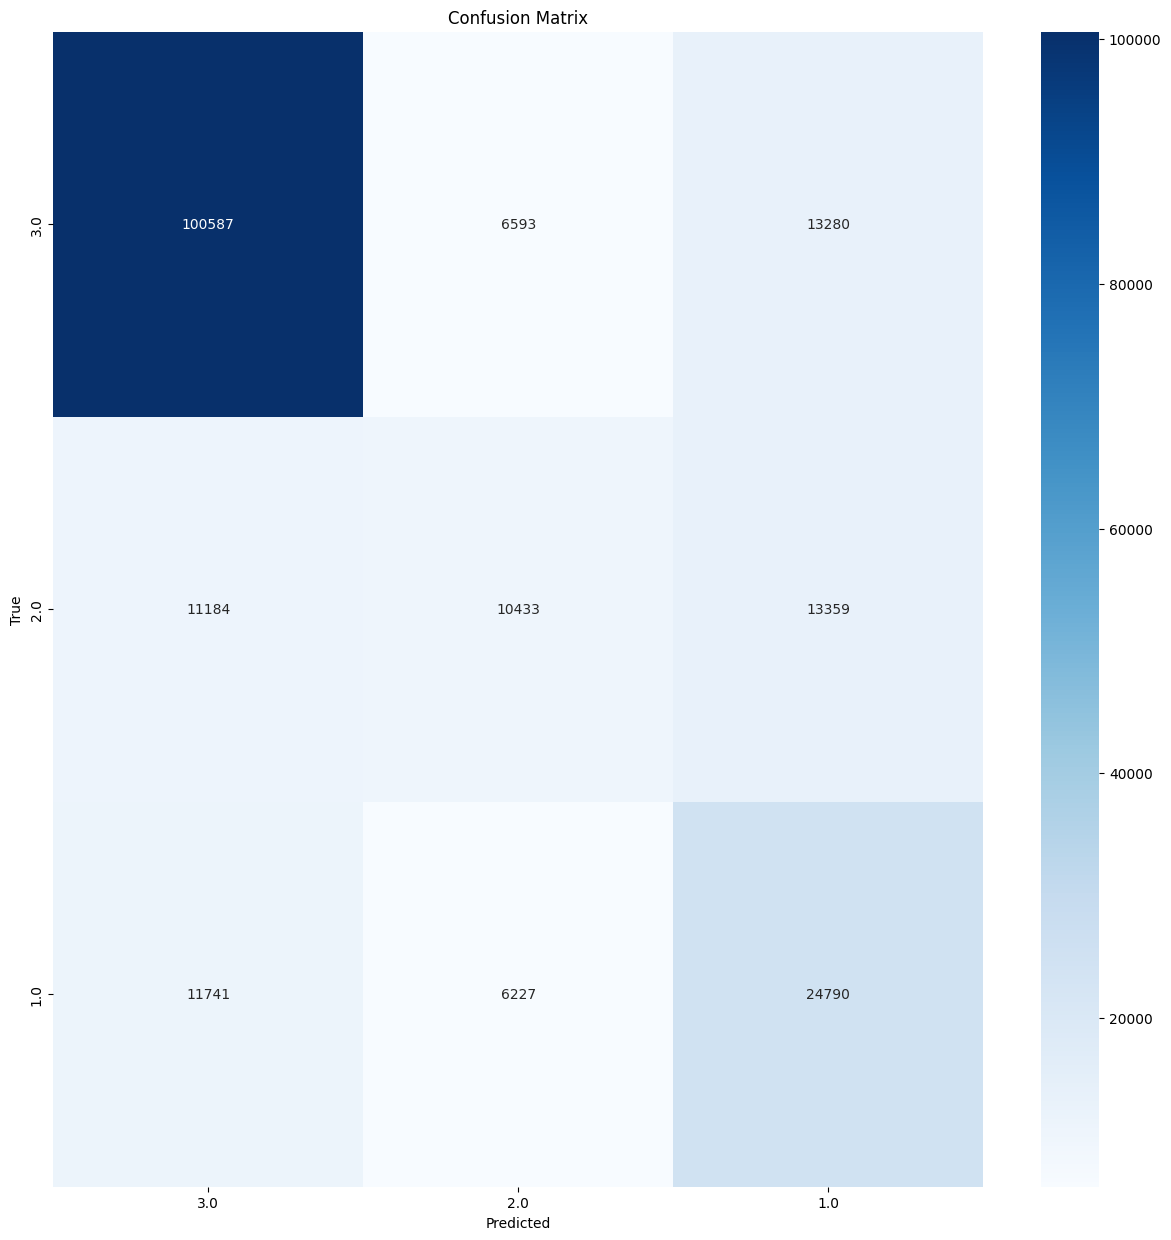

In [50]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features):

y_pred_corr = softmax_model_corr.predict(sf_corr_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_corr)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset['Raucher_Status'].unique() , yticklabels=dataset['Raucher_Status'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_corr, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_corr, average='weighted')
print(f'Recall: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.68
Recall: 0.69
F1 score: 0.62


Sowohl die Precision als auch der Recall haben sich verbessert. Zudem werden nun auch Werte für den Raucherstatus 2 prädiziert.

Weiterer Versuch:

In [52]:
# Versuch das dritte Modell zu trainieren (mit mehr Iterationen):

# softmax_model_corr_2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
# softmax_model_corr_2.fit(sf_corr2, y_train)

In [53]:
# Eine weitere Feature-Selektion aus dem korrelierenden und SelectedFeature-Alg mit einem max_iterator = 2000 dauert ungewöhnlich lange 
# zu trainieren, weshalb wir diese auslassen und es erneut mit 1500 Iterationen versuchen.

In [54]:
softmax_model_corr_2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1500)
softmax_model_corr_2.fit(sf_corr2, y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial', solver='saga')

Accuracy: 0.69


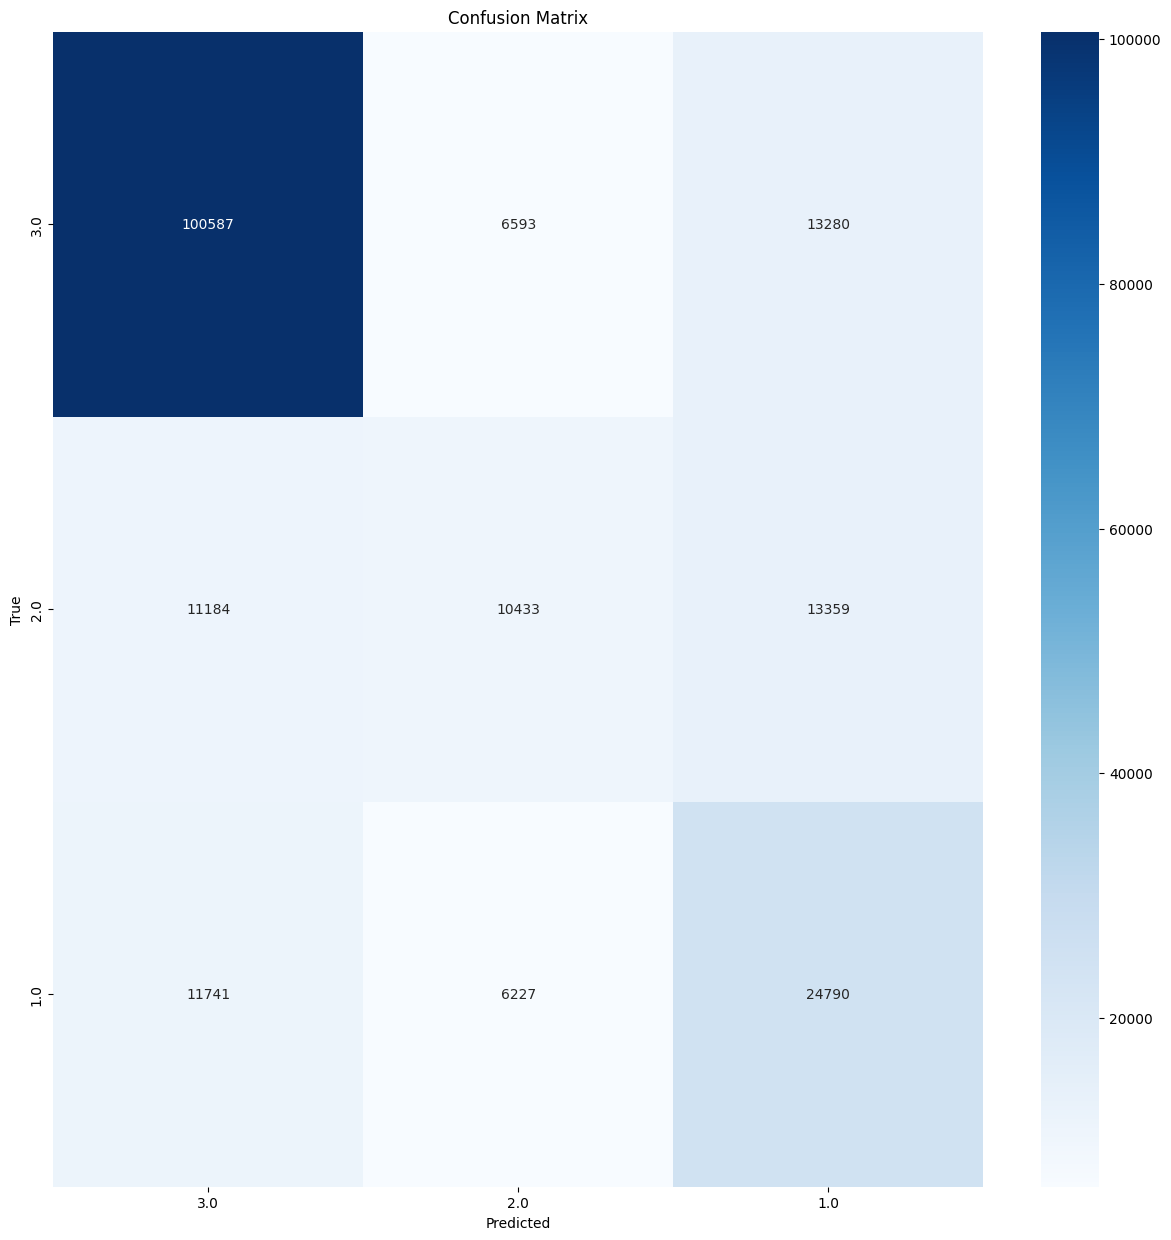

In [55]:
# Vorhersagen auf dem Testdatensatz machen (nur für die selektierten Features):

y_pred_corr_2 = softmax_model_corr_2.predict(sf_corr2_test)

# Validierung
accuracy_2 = accuracy_score(y_test, y_pred_corr_2)
print(f'Accuracy: {accuracy_2:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr_2)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset['Raucher_Status'].unique() , yticklabels=dataset['Raucher_Status'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_corr_2, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_corr_2, average='weighted')
print(f'Recall: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_corr_2, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.68
Recall: 0.69
F1 score: 0.68


Korrelierenden Features führen zu einem besseren Ergebnis.

Dennoch ist eine Precision von 68 % nicht sehr hoch. Deshalb werden wir zudem ein resampling der Daten durchführen, sodass die
Klassen etwa gleich verteilt sind. Das Ziel ist es, eine höhere Precision zu erreichen.

Es muss jedoch auch gesagt werden, dass es von den gesundheitlichen Faktoren schwer ist, Raucher von ehemaligen 
Rauchern zu unterscheiden. 
In diesem Fall, der einer Versicherung, ist dies jedoch nur sekundär, da ehemalige Raucher auch anfälliger für Raucherkrankheiten sind.
Deshalb werden die Raucherstati 'ehemaliger Raucher' und 'Raucher' im folgenden Schritt zusammengeführt und resampelt.

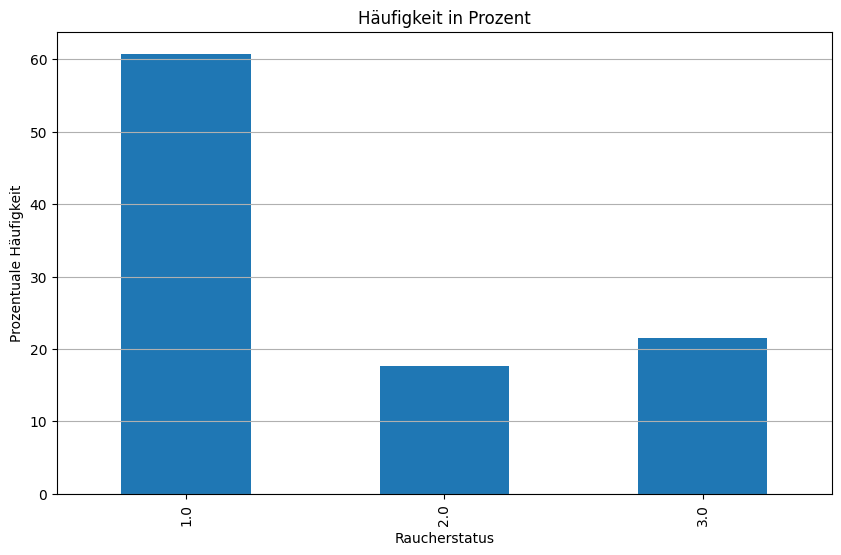

In [57]:
# Berechne relative Häufigkeit der Zielwerte in Prozent 

frequency = (dataset['Raucher_Status'].sort_values().value_counts(sort=False) / len(dataset)) * 100 

# Balkendiagramm über die Verteilung 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Raucherstatus') 
plt.ylabel('Prozentuale Häufigkeit') 
plt.title('Häufigkeit in Prozent') 
plt.grid(axis='y') 
plt.show()

Random under-sampling:
Raucher_Status
1.0    388668
2.0    388668
Name: count, dtype: int64


<Axes: title={'center': 'Anzahl je Raucher_Status'}, xlabel='Raucher_Status'>

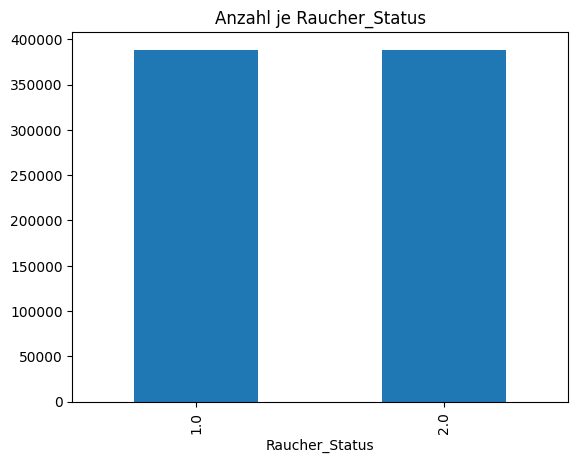

In [58]:
# Ein Resampling der Daten könnte das Ergebnis verbessern. 

# In diesem Fall verwenden wir Undersampling, da wir bereits einen großen Datensatz haben. 
# Bei Oversampling würde zudem das Rauschen verstärkt werden.

# Zudem legen wir die Raucherstati 2 (ehem. Raucher) und 3 (aktive Raucher) zusammen, da sie aus der gesundheitlichen Perspektive starke Gemeinsamkeiten aufweisen, 
# wie es auch die bisherigen Klassifikationsverfahren gezeigt haben.

dataset['Raucher_Status'] = dataset['Raucher_Status'].replace(3,2)

count_class_0, count_class_1 = dataset['Raucher_Status'].sort_values().value_counts()

# Aufteilen in Zielklassen

class_0 = dataset[dataset['Raucher_Status'] == 1]
class_1 = dataset[dataset['Raucher_Status'] == 2]


class_0_under = class_0.sample(count_class_1)
data_undersample = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(data_undersample['Raucher_Status'].value_counts())

data_undersample['Raucher_Status'].value_counts().plot(kind='bar', title='Anzahl je Raucher_Status')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data_undersample.drop(columns=['Raucher_Status']), data_undersample['Raucher_Status'], test_size=0.2, random_state=42)

X_train

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,Triglycerid,Hämoglobin,SGOT_AST,SGOT_ALT,gamma_GTP,Trinker,Body-Mass-Index
609742,0,70,145,60,89.0,90.0,60.0,107.0,249.0,77.0,135.0,182.0,14.4,14.0,9.0,13.0,0,28.54
501665,1,45,165,80,90.0,125.0,81.0,103.0,207.0,48.0,58.0,504.0,15.4,23.0,21.0,54.0,1,29.38
301205,0,70,150,55,83.0,121.0,67.0,80.0,245.0,86.0,147.0,59.0,12.3,22.0,11.0,13.0,0,24.44
186189,0,40,170,60,68.0,99.0,56.0,89.0,200.0,93.0,101.0,29.0,13.6,18.0,14.0,16.0,0,20.76
139280,1,60,170,75,91.0,130.0,80.0,102.0,205.0,73.0,118.0,70.0,16.2,22.0,27.0,23.0,1,25.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355140,1,45,175,75,84.0,132.0,88.0,94.0,211.0,40.0,156.0,73.0,14.9,26.0,33.0,77.0,1,24.49
707106,0,40,150,45,66.0,139.0,85.0,106.0,188.0,87.0,77.0,116.0,10.6,19.0,15.0,17.0,1,20.00
339593,0,40,155,60,71.0,110.0,66.0,97.0,168.0,55.0,96.0,85.0,12.8,12.0,8.0,10.0,0,24.97
732194,1,50,170,65,80.0,128.0,81.0,85.0,231.0,61.0,117.0,261.0,14.0,34.0,46.0,44.0,1,22.49


In [60]:
# Features auswählen:

undersampled = X_train[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

undersampled_test = X_test[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

In [61]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model.fit(undersampled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.83


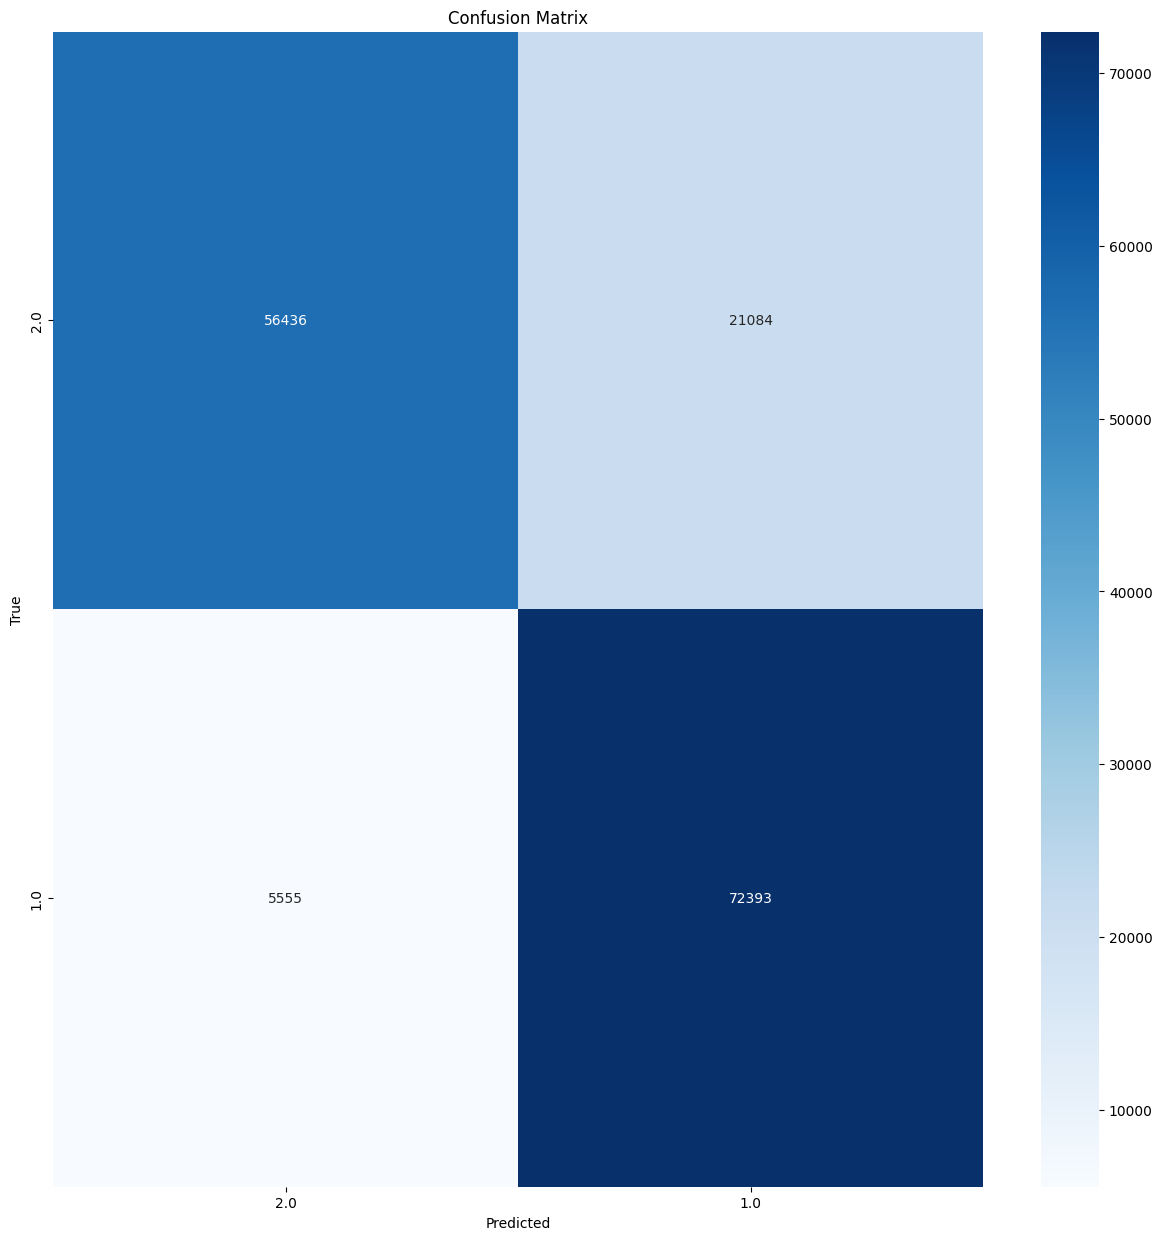

In [62]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_model_undersample = softmax_model.predict(undersampled_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_model_undersample)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen:

cm = confusion_matrix(y_test, y_pred_model_undersample)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset['Raucher_Status'].unique() , yticklabels=dataset['Raucher_Status'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_model_undersample, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_model_undersample, average='weighted')
print(f'Recall weighted: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model_undersample, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.84
Recall weighted: 0.83
F1 score: 0.83


Das undersampelte Dataset gibt deutlich bessere Werte zurück als das die anderen Datensätze.

Dieses Modell könnte also deutlich besser zur Klassifikation verwendet werden.

Wenn wir die Parameter für die Classifikation an Hand des feature_selection Algorithmusses auswählen, dann sind die Ergebnisse ungenauer als durch Korrelation.

In der Praxis wären die Algorithmen der ungesampelten Datensätze nicht aussagekräftig genug, um sich alleine auf ihn zu verlassen.
Dennoch könnte er als Indikator dienen, um entscheiden zu können, um ein Proband / eine Probandin in Bezug auf den Raucherstatus lügt. 

In [64]:
# Speichern des Modells:

# joblib.dump(softmax_model, 'Modelle/6_Klassifikation/softmax_model_final.joblib')

# Laden:

loaded_softmax_model = joblib.load('Modelle/6_Klassifikation/softmax_model_final.joblib')